In [22]:
import numpy as np
from littlezoo import LittleZoo

In [23]:
env = LittleZoo()

In [24]:
env.env_params['categories']['carnivore']

('lion', 'tiger', 'bobcat', 'panthera', 'coyote', 'wolf')

In [25]:
goal = ['Grow lion', 'tomato', 'water', 'rabbit', 'lion']

In [26]:
env.reset(goal)

/home/loris/anaconda3/envs/playground-text/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:168: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.deprecation(
/home/loris/anaconda3/envs/playground-text/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/home/loris/anaconda3/envs/playground-text/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/loris/anaconda3/envs/playground-text/lib/python3.10/site-packages/gymnasium/utils/passive_env_ch

('You see: tomato seed, water, baby rabbit, baby lion\nYou are standing on: nothing\nInventory (0/2): empty',
 {'goal': 'Grow lion',
  'possible_actions': ['Grasp',
   'Go to tomato seed',
   'Go to water',
   'Go to baby rabbit',
   'Go to baby lion'],
  'inventory': []})

In [27]:
env.step("Grasp")

('You see: tomato seed, water, baby rabbit, baby lion\nYou are standing on: nothing\nInventory (0/2): empty',
 0.0,
 False,
 False,
 {'goal': 'Grow lion',
  'possible_actions': ['Grasp',
   'Go to tomato seed',
   'Go to water',
   'Go to baby rabbit',
   'Go to baby lion'],
  'inventory': []})

In [ ]:
furnitures = ('door', 'chair', 'table', 'bed', 'wardrobe')
plants = ('potato', 'carrot', 'tomato', 'cucumber', 'lettuce')
herbivores = ('rabbit', 'pig', 'sheep', 'cow', 'horse')
carnivores = ('lion', 'tiger', 'wolf', 'bear', 'fox')
supplies = ('water',)

objects = furnitures + plants + herbivores + carnivores + supplies
# Shuffle

impossibles = []
grasp = []
grow_plants = []
grow_herbivores = []
grow_carnivores = []
goals = {}

def get_name(obj):
    if obj in plants:
        return obj + ' seed'
    elif obj in herbivores + carnivores:
        return 'baby ' + obj
    else:
        return obj

for i, e1 in enumerate(objects):
            e1_name = get_name(e1)
            for j, e2 in enumerate(objects):
                e2_name = get_name(e2)
                for k, e3 in enumerate(objects):
                    e3_name = get_name(e3)
                    for e4 in objects:
                        e4_name = get_name(e4)
                        for o in objects:
                            for t in ('Grasp', 'Grow'):
                                g = f'Goal: {t} {o}\n'
                                g += f'You see: {e1_name}, {e2_name}, {e3_name}, {e4_name}\n'
                                g += 'You are standing on: nothing\n'
                                g += 'Inventory (0/2): empty\n'
                                g += 'Action: '
                                
                                # Impossible goals
                                if o not in (e1, e2, e3, e4) or t == 'Grow' and (o in furnitures + supplies or 'water' not in (e1, e2, e3, e4) or o in herbivores + carnivores and e1 not in plants and e2 not in plants and e3 not in plants and e4 not in plants or o in carnivores and e1 not in herbivores and e2 not in herbivores and e3 not in herbivores and e4 not in herbivores):
                                    impossibles.append(g)
                                elif t == 'Grasp':
                                    grasp.append(g)
                                elif o in plants:
                                    grow_plants.append(g)
                                elif o in herbivores:
                                    grow_herbivores.append(g)
                                elif o in carnivores:
                                    grow_carnivores.append(g)
                                else:
                                    print(g)
                                
                                goals[g] = (t + ' ' + o, e1, e2, e3, e4)
                                
all_goals = impossibles + grasp + grow_plants + grow_herbivores + grow_carnivores
len(all_goals)

4952198

In [48]:
print(len(impossibles), len(grasp), len(grow_plants), len(grow_herbivores), len(grow_carnivores))

4438893 481555 19450 9300 3000


In [49]:
len(grow_plants) / (len(grasp) + len(grow_plants) + len(grow_herbivores) + len(grow_carnivores))

0.03789170181471055

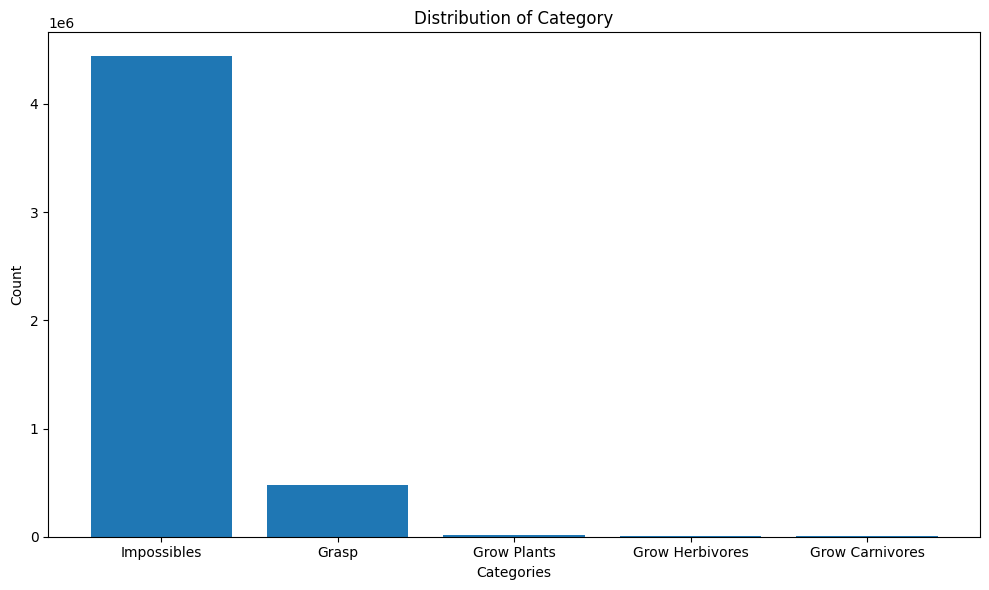

In [50]:
from matplotlib import pyplot as plt
categories = ['Impossibles', 'Grasp', 'Grow Plants', 'Grow Herbivores', 'Grow Carnivores']
values = [len(impossibles), len(grasp), len(grow_plants), len(grow_herbivores), len(grow_carnivores)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [46]:
grow_carnivores

['Goal: Grow lion\nYou see: potato seed, baby rabbit, baby lion, water\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow tiger\nYou see: potato seed, baby rabbit, baby tiger, water\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow wolf\nYou see: potato seed, baby rabbit, baby wolf, water\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow bear\nYou see: potato seed, baby rabbit, baby bear, water\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow fox\nYou see: potato seed, baby rabbit, baby fox, water\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow lion\nYou see: potato seed, baby rabbit, water, baby lion\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow tiger\nYou see: potato seed, baby rabbit, water, baby tiger\nYou are standing on: nothing\nInventory (0/2): empty\nAction: ',
 'Goal: Grow wolf\nYou see: potato seed